# Гальванометр

последняя лаба 3 семестра (заебало это все)

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [42]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [43]:
a = 0.91

In [44]:
R = [6, 12, 18, 24, 30, 36, 42, 48, 54]
R = [r * 1000 for r in R]

x = [22.5, 11.8, 8, 6, 4.8, 4, 3.4, 3, 2.6]
x = [i / 100 for i in x]

U_0 = 1.4 # V
R_0 = 560 # Om
k = 1/2000

I = [U_0 * k / (r + R_0) for r in R]
I

[1.0670731707317073e-07,
 5.573248407643312e-08,
 3.771551724137931e-08,
 2.8501628664495114e-08,
 2.2905759162303665e-08,
 1.9146608315098467e-08,
 1.644736842105263e-08,
 1.441515650741351e-08,
 1.282991202346041e-08]

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_12761/374559377.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x, k*x + b, label=f'k = {round(k * 1e8, 2)}$\\pm$ {round(kerr*1e8, 2)} $\cdot$ 10^-8')


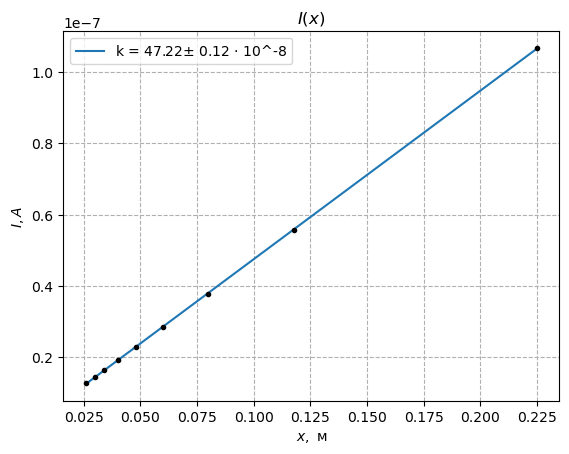

In [45]:
k, b, kerr, berr = LeastSquares(x, I)
plt.figure()
plt.title("$I(x)$")
plt.xlabel("$x,$ м")
plt.ylabel("$I, A$")

plt.grid(True, linestyle="--")
plt.errorbar([i for i in x], [i for i in I], fmt=".k")
x = np.array([min(x), max(x)])
plt.plot(x, k*x + b, label=f'k = {round(k * 1e8, 2)}$\\pm$ {round(kerr*1e8, 2)} $\cdot$ 10^-8')

plt.legend()
plt.show()

In [46]:
C_I = 2 * 0.91 * k
C_I_err = 2 * 0.91 * kerr
1/C_I, C_I_err/C_I**2

(np.float64(1163546.3811247202), np.float64(2898.7068622446745))

In [47]:
l = [22.8, 21.2, 21, 20, 19, 17, 9, 6.5]
l = [i * 0.01 for i in l]

R = [85560, 60560, 50560, 40560, 30560, 20560, 5560, 3560]

/tmp/ipykernel_12761/4155464333.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


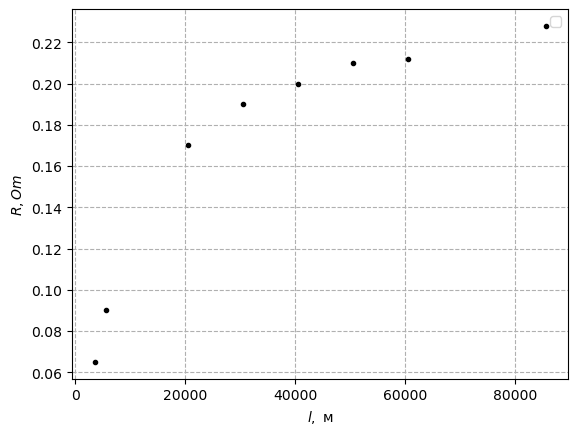

In [48]:
plt.figure()
plt.title("")
plt.xlabel("$l,$ м")
plt.ylabel("$R, Om$")

plt.grid(True, linestyle="--")
plt.errorbar([i for i in R], [i for i in l], fmt=".k")
x = np.array([min(R), max(R)])

plt.legend()
plt.show()